In [1]:
pip install openai

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import openai

from openai import OpenAI

In [3]:
os.environ["OPENAI_API_KEY"] = "XXXX"
client = OpenAI()

In [12]:
model_list = client.models.list()
for model in model_list.data:
    print(model.id)


whisper-1
tts-1
dall-e-2
tts-1-hd-1106
tts-1-hd
gpt-3.5-turbo-1106
gpt-4-0125-preview
gpt-4-turbo-preview
text-embedding-3-small
text-embedding-3-large
gpt-3.5-turbo-16k
gpt-4-1106-preview
gpt-4-turbo-2024-04-09
gpt-3.5-turbo-16k-0613
babbage-002
gpt-4o-2024-05-13
gpt-4-turbo
gpt-3.5-turbo-0613
gpt-4
gpt-4-0613
dall-e-3
gpt-3.5-turbo-0125
tts-1-1106
gpt-3.5-turbo
gpt-3.5-turbo-instruct
gpt-3.5-turbo-instruct-0914
gpt-3.5-turbo-0301
text-embedding-ada-002
davinci-002
gpt-4o


In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Function to display image from a given URL
def show_image_from_url(url):
    response = requests.get(url)                # Send a GET request to the image URL
    img = Image.open(BytesIO(response.content)) # Open the image from the bytes in the response
    plt.imshow(img)                             # Use Matplotlib to display the image
    plt.axis('off')                             # Hide the axis to only show the image
    plt.show()

In [15]:
import requests

def save_image_from_url(url, file_path):
    response = requests.get(url)
    if response.status_code == 200:  # Check if the request was successful
        with open(file_path, 'wb') as f:  # Open a file in binary write mode
            f.write(response.content)  # Write the content of the response to the file
        print(f"Image saved at {file_path}")
    else:
        print(f"Error: Unable to retrieve image. Status code: {response.status_code}")

In [19]:
response = client.images.generate(
    prompt = "A cutting chai with biscuit on a rainy day in Mumbai",
    size="1024x1024",
    n=1
)

image_url = response.data[0].url

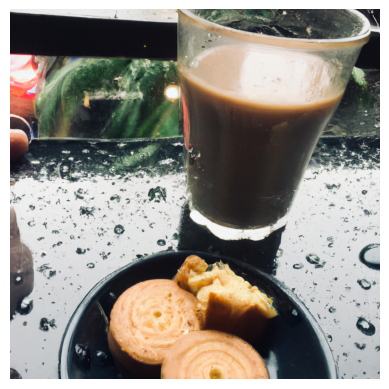

In [20]:
show_image_from_url(image_url)

In [21]:
save_image_from_url(image_url, "test_img.jpg")

Image saved at test_img.jpg


In [32]:
from PIL import Image

# Load the mask image
mask = Image.open('mask.png')

resized_mask = mask.resize((1024, 1024), Image.LANCZOS)
resized_mask.save('resized_mask.png')

In [37]:
res = client.images.edit(
    image=open("test_img.jpg","rb"),
    mask=open("resized_mask.png","rb"),
    prompt="Chai with a Aloo Patty",
    n=2,
    size="1024x1024"
)

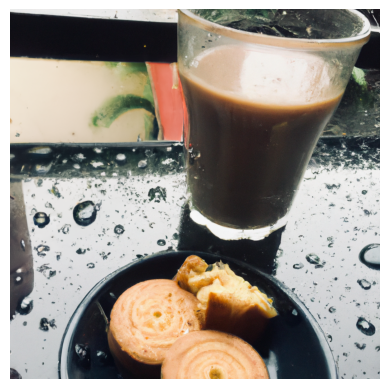

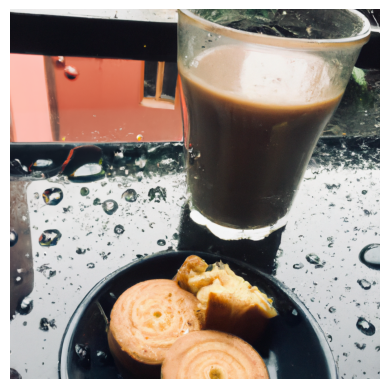

In [38]:
for image in res.data:
    show_image_from_url(image.url)